## 1. Installing and Importing Python Libraries and Dependencies

In [6]:
pip install beautifulsoup4

     |████████████████████████████████| 112kB 5.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [224]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [7]:
!pip install geopy

In [8]:
!pip install geocoder

In [9]:

!pip install folium

In [10]:
import pandas as pd
import csv
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


In [11]:
import pandas as pd
url='https://www.data.gouv.fr/en/datasets/r/0d3553c6-45c0-4b16-82be-5ef314437d3e'
paris_data = pd.read_csv(url,sep=";") # use sep="," for coma separation. 
paris_data.describe()

,N_SQ_AR,C_AR,C_ARINSEE,N_SQ_CO,SURFACE,PERIMETRE,OBJECTID,LONGUEUR
count,2.000000e+01,20.00000,20.00000,20.0,2.000000e+01,20.000000,20.00000,20.000000
mean,7.500000e+08,10.50000,75110.50000,750001537.0,5.268639e+06,9522.189982,10.50000,9521.736963
std,5.916080e+00,5.91608,5.91608,0.0,4.362220e+06,4726.891345,5.91608,4726.574946
min,7.500000e+08,1.00000,75101.00000,750001537.0,9.911537e+05,4519.263648,1.00000,4519.071982
25%,7.500000e+08,5.75000,75105.75000,750001537.0,2.172001e+06,6413.490067,5.75000,6413.247710
50%,7.500000e+08,10.50000,75110.50000,750001537.0,3.985047e+06,8190.718385,10.50000,8190.334219
75%,7.500000e+08,15.25000,75115.25000,750001537.0,6.195201e+06,10894.980257,15.25000,10894.747493
max,7.500000e+08,20.00000,75120.00000,750001537.0,1.637254e+07,24089.666298,20.00000,24088.038922


In [12]:
paris_data.head()

,N_SQ_AR,C_AR,C_ARINSEE,L_AR,L_AROFF,N_SQ_CO,SURFACE,PERIMETRE,Geometry X Y,Geometry,OBJECTID,LONGUEUR
0,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"48.8444431505,2.35071460958","{""type"": ""Polygon"", ""coordinates"": [[[2.364433...",5,6238.823408
1,750000006,6,75106,6ème Ardt,Luxembourg,750001537,2.153096e+06,6483.686786,"48.8491303586,2.33289799905","{""type"": ""Polygon"", ""coordinates"": [[[2.344592...",6,6483.324560
2,750000012,12,75112,12ème Ardt,Reuilly,750001537,1.631478e+07,24089.666298,"48.8349743815,2.42132490078","{""type"": ""Polygon"", ""coordinates"": [[[2.413879...",12,24088.038922
3,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"48.8625627018,2.33644336205","{""type"": ""Polygon"", ""coordinates"": [[[2.328007...",1,6054.680862
4,750000007,7,75107,7ème Ardt,Palais-Bourbon,750001537,4.090057e+06,8099.424883,"48.8561744288,2.31218769148","{""type"": ""Polygon"", ""coordinates"": [[[2.320902...",7,8099.033151


In [90]:
paris = paris_data.drop(['N_SQ_AR', 'PERIMETRE', 'N_SQ_CO', 'Geometry','OBJECTID', 'LONGUEUR', 'SURFACE','C_AR','L_AROFF','Geometry X Y'], axis=1)

In [91]:
paris.columns = ['postal code','neigbourhood']

In [92]:
paris

,postal code,neigbourhood
0,75105,5ème Ardt
1,75106,6ème Ardt
2,75112,12ème Ardt
3,75101,1er Ardt
4,75107,7ème Ardt
5,75109,9ème Ardt
6,75119,19ème Ardt
7,75110,10ème Ardt
8,75116,16ème Ardt
9,75104,4ème Ardt


In [93]:

data =['Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris']
postalcode = ['75005','75006','75012','75001','75007','75009','75019','75010','75016','75004','75008', '75018','75002','75017','75011','75013','75014','75020','75015','75003']
paris['Borough'] = data
paris['postal code'] = postalcode


In [94]:
def get_latlng(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Paris'.format(postal_code))
        lat_lng_coords = g.latlng
    return lat_lng_coords
    
get_latlng('75016')

[48.857120000000066, 2.255970651000041]

In [95]:
address = '16th arrondissement of Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris 16 are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris 16 are 48.8631709, 2.2757648.


In [96]:
# Retrieving Postal Code Co-ordinates
postal_codes = paris['postal code']    
coords = [ get_latlng(postal_code) for postal_code in postal_codes.tolist() ]

In [97]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
paris['Latitude'] = df_coords['Latitude']
paris['Longitude'] = df_coords['Longitude']

In [98]:
paris[['Borough', 'postal code', 'neigbourhood', 'Latitude', 'Longitude']]

,Borough,postal code,neigbourhood,Latitude,Longitude
0,Paris,75005,5ème Ardt,48.845350,2.351892
1,Paris,75006,6ème Ardt,48.849265,2.332099
2,Paris,75012,12ème Ardt,48.835120,2.444957
3,Paris,75001,1er Ardt,48.863415,2.336771
4,Paris,75007,7ème Ardt,48.854620,2.313061
5,Paris,75009,9ème Ardt,48.876995,2.337893
6,Paris,75019,19ème Ardt,48.883945,2.385625
7,Paris,75010,10ème Ardt,48.876155,2.362330
8,Paris,75016,16ème Ardt,48.857120,2.255971
9,Paris,75004,4ème Ardt,48.854275,2.361467


In [99]:
paris

,postal code,neigbourhood,Borough,Latitude,Longitude
0,75005,5ème Ardt,Paris,48.845350,2.351892
1,75006,6ème Ardt,Paris,48.849265,2.332099
2,75012,12ème Ardt,Paris,48.835120,2.444957
3,75001,1er Ardt,Paris,48.863415,2.336771
4,75007,7ème Ardt,Paris,48.854620,2.313061
5,75009,9ème Ardt,Paris,48.876995,2.337893
6,75019,19ème Ardt,Paris,48.883945,2.385625
7,75010,10ème Ardt,Paris,48.876155,2.362330
8,75016,16ème Ardt,Paris,48.857120,2.255971
9,75004,4ème Ardt,Paris,48.854275,2.361467


## **Map of Paris**

In [103]:
# create map of New York using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neigbourhood in zip(paris['Latitude'], paris['Longitude'], paris['Borough'], paris['neigbourhood']):
    label = '{}, {}'.format(neigbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [104]:
CLIENT_ID = 'JWXINA1F2B00GP202TFBKSZ01E4P3OVMECGRB4FC45Z0XUWT' # your Foursquare ID
CLIENT_SECRET = 'MAQTL0WQ1TETIOGQOCOVJHUHWDXUVMSG1ZEZMRQLI5RFEZ2O' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JWXINA1F2B00GP202TFBKSZ01E4P3OVMECGRB4FC45Z0XUWT
CLIENT_SECRET:MAQTL0WQ1TETIOGQOCOVJHUHWDXUVMSG1ZEZMRQLI5RFEZ2O


In [106]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [107]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.neighborhood',
       'venue.venuePage.id'],
      dtype='object')

In [108]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### **Nearby Venues/Locations**

In [109]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Bon,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",48.860282,2.274636
1,Le Flandrin,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",48.864170,2.272247
2,Hôtel Brach,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",48.861217,2.275082
3,You Decide,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",48.866776,2.278538
4,Restaurant Brach,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",48.861246,2.275068


### **Categories of Nearby Venues/Locations**

In [110]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Bon,French Restaurant,48.860282,2.274636
1,Le Flandrin,French Restaurant,48.864170,2.272247
2,Hôtel Brach,Hotel,48.861217,2.275082
3,You Decide,Café,48.866776,2.278538
4,Restaurant Brach,Restaurant,48.861246,2.275068


In [111]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Bakery                 9
French Restaurant      9
Italian Restaurant     7
Supermarket            3
Café                   3
Hotel                  2
Chinese Restaurant     2
Japanese Restaurant    2
Park                   2
Garden                 2
Name: categories, dtype: int64

In [112]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [115]:
# Nearby Venues
Paris_venues = getNearbyVenues(names=paris['neigbourhood'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

5ème Ardt
6ème Ardt
12ème Ardt
1er Ardt
7ème Ardt
9ème Ardt
19ème Ardt
10ème Ardt
16ème Ardt
4ème Ardt
8ème Ardt
18ème Ardt
2ème Ardt
17ème Ardt
11ème Ardt
13ème Ardt
14ème Ardt
20ème Ardt
15ème Ardt
3ème Ardt


In [125]:
print('There are {} Uniques Categories.'.format(len(Paris_venues['Venue Category'].unique())))
Paris_venues.groupby('Neighborhood').count().head()

There are 223 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
10ème Ardt,100,100,100,100,100,100
11ème Ardt,98,98,98,98,98,98
12ème Ardt,16,16,16,16,16,16
13ème Ardt,87,87,87,87,87,87
14ème Ardt,100,100,100,100,100,100


#### **One Hot Encoding of Features**

In [127]:
# one hot encoding
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Paris_onehot['Neighborhood'] = Paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot = Paris_onehot[fixed_columns]
Paris_grouped = Paris_onehot.groupby('Neighborhood').mean().reset_index()
Paris_onehot.head(5)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Trail,Bistro,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Canal,Candy Store,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Embassy / Consulate,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General College & University,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,National Park,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Provençal Restaurant,Pub,Racecourse,Ramen Restaurant,Record Shop,Recreation Center,Resort,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Soba Restaurant,Soccer Field,Southern / Soul Food Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,5ème Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5ème Ardt,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [128]:
num_top_venues = 5
for hood in Paris_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Paris_grouped[Paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- 10ème Ardt ----
                venue  freq
0   French Restaurant  0.09
1  Italian Restaurant  0.06
2                 Bar  0.05
3         Coffee Shop  0.05
4  Seafood Restaurant  0.04


---- 11ème Ardt ----
               venue  freq
0  French Restaurant  0.13
1                Bar  0.08
2         Restaurant  0.06
3             Bistro  0.05
4       Cocktail Bar  0.05


---- 12ème Ardt ----
                   venue  freq
0                Theater  0.19
1  Performing Arts Venue  0.06
2          National Park  0.06
3       Botanical Garden  0.06
4   Fast Food Restaurant  0.06


---- 13ème Ardt ----
                   venue  freq
0  Vietnamese Restaurant  0.15
1       Asian Restaurant  0.13
2        Thai Restaurant  0.09
3      French Restaurant  0.09
4                  Hotel  0.08


---- 14ème Ardt ----
                venue  freq
0   French Restaurant  0.22
1               Hotel  0.10
2  Italian Restaurant  0.05
3              Bakery  0.04
4                Café  0.03


---- 15ème Ardt

In [129]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### **Most Common venues near neighborhood**

In [133]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Paris_grouped['Neighborhood']

for ind in np.arange(Paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10ème Ardt,French Restaurant,Italian Restaurant,Coffee Shop,Bar,Seafood Restaurant,Breakfast Spot,Hotel,African Restaurant,Bistro,Pizza Place
1,11ème Ardt,French Restaurant,Bar,Restaurant,Cocktail Bar,Bistro,Italian Restaurant,Bakery,Record Shop,Coffee Shop,Pizza Place
2,12ème Ardt,Theater,Playground,Restaurant,Fast Food Restaurant,Soccer Field,Sports Club,Stadium,Botanical Garden,Bike Trail,National Park
3,13ème Ardt,Vietnamese Restaurant,Asian Restaurant,French Restaurant,Thai Restaurant,Hotel,Chinese Restaurant,Juice Bar,Sushi Restaurant,Bakery,Japanese Restaurant
4,14ème Ardt,French Restaurant,Hotel,Italian Restaurant,Bakery,Vietnamese Restaurant,Pizza Place,Food & Drink Shop,Café,Bar,Restaurant


### **K-Means Clustering Approach**

In [169]:
kclusters = 5

In [221]:
# Using K-Means to cluster neighborhood into 5 clusters
Paris_grouped_clustering = Paris_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)
kmeans.labels_[0:10] 

array([1, 4, 0, 3, 1, 1, 2, 1, 4, 4], dtype=int32)

In [223]:

Paris_merged = paris

# merge Paris_grouped with paris_data to add latitude/longitude for each neighborhood
Paris_merged = Paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neigbourhood')

Paris_merged.head(10) # check the last columns!

,postal code,neigbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75005,5ème Ardt,Paris,48.845350,2.351892,0,French Restaurant,Bakery,Garden,Plaza,Japanese Restaurant,Coffee Shop,Italian Restaurant,Museum,Bar,Zoo Exhibit
1,75006,6ème Ardt,Paris,48.849265,2.332099,0,French Restaurant,Italian Restaurant,Hotel,Wine Bar,Chocolate Shop,Plaza,Ice Cream Shop,Sandwich Place,Bakery,Theater
2,75012,12ème Ardt,Paris,48.835120,2.444957,2,Theater,Playground,Restaurant,Fast Food Restaurant,Soccer Field,Sports Club,Stadium,Botanical Garden,Bike Trail,National Park
3,75001,1er Ardt,Paris,48.863415,2.336771,0,Japanese Restaurant,French Restaurant,Hotel,Plaza,Italian Restaurant,Historic Site,Art Museum,Wine Bar,Coffee Shop,Tea Room
4,75007,7ème Ardt,Paris,48.854620,2.313061,0,French Restaurant,Hotel,Café,Plaza,Coffee Shop,History Museum,Historic Site,Cocktail Bar,Garden,Bistro
5,75009,9ème Ardt,Paris,48.876995,2.337893,0,French Restaurant,Hotel,Wine Bar,Japanese Restaurant,Italian Restaurant,Pizza Place,Cocktail Bar,Coffee Shop,Theater,Bar
6,75019,19ème Ardt,Paris,48.883945,2.385625,0,French Restaurant,Supermarket,Bar,Pool,Italian Restaurant,Café,Seafood Restaurant,Bike Rental / Bike Share,Beer Bar,Restaurant
7,75010,10ème Ardt,Paris,48.876155,2.362330,0,French Restaurant,Italian Restaurant,Coffee Shop,Bar,Seafood Restaurant,Breakfast Spot,Hotel,African Restaurant,Bistro,Pizza Place
8,75016,16ème Ardt,Paris,48.857120,2.255971,1,Racecourse,Plaza,Circus,Lake,Park,Diner,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant
9,75004,4ème Ardt,Paris,48.854275,2.361467,0,French Restaurant,Italian Restaurant,Wine Bar,Hotel,Ice Cream Shop,Clothing Store,Cocktail Bar,Tea Room,Garden,Cultural Center


### **Map of Clusters**

In [175]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged['Latitude'], Paris_merged['Longitude'], Paris_merged['neigbourhood'], Paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### **Examine Clusters**

In [176]:
df1=Paris_merged.loc[Paris_merged['Cluster Labels'] == 0,Paris_merged.columns[[2] + list(range(5, Paris_merged.shape[1]))]]
df2=Paris_merged.loc[Paris_merged['Cluster Labels'] == 1,Paris_merged.columns[[2] + list(range(5, Paris_merged.shape[1]))]]
df3=Paris_merged.loc[Paris_merged['Cluster Labels'] == 2,Paris_merged.columns[[2] + list(range(5, Paris_merged.shape[1]))]]
df4=Paris_merged.loc[Paris_merged['Cluster Labels'] == 3,Paris_merged.columns[[2] + list(range(5, Paris_merged.shape[1]))]]
df5=Paris_merged.loc[Paris_merged['Cluster Labels'] == 4,Paris_merged.columns[[2] + list(range(5, Paris_merged.shape[1]))]]

In [162]:
df1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paris,0,French Restaurant,Bakery,Garden,Plaza,Japanese Restaurant,Coffee Shop,Italian Restaurant,Museum,Bar,Zoo Exhibit
1,Paris,0,French Restaurant,Italian Restaurant,Hotel,Wine Bar,Chocolate Shop,Plaza,Ice Cream Shop,Sandwich Place,Bakery,Theater
3,Paris,0,Japanese Restaurant,French Restaurant,Hotel,Plaza,Italian Restaurant,Historic Site,Art Museum,Wine Bar,Coffee Shop,Tea Room
4,Paris,0,French Restaurant,Hotel,Café,Plaza,Coffee Shop,History Museum,Historic Site,Cocktail Bar,Garden,Bistro
5,Paris,0,French Restaurant,Hotel,Wine Bar,Japanese Restaurant,Italian Restaurant,Pizza Place,Cocktail Bar,Coffee Shop,Theater,Bar
6,Paris,0,French Restaurant,Supermarket,Bar,Pool,Italian Restaurant,Café,Seafood Restaurant,Bike Rental / Bike Share,Beer Bar,Restaurant
7,Paris,0,French Restaurant,Italian Restaurant,Coffee Shop,Bar,Seafood Restaurant,Breakfast Spot,Hotel,African Restaurant,Bistro,Pizza Place
9,Paris,0,French Restaurant,Italian Restaurant,Wine Bar,Hotel,Ice Cream Shop,Clothing Store,Cocktail Bar,Tea Room,Garden,Cultural Center
10,Paris,0,French Restaurant,Hotel,Art Gallery,Japanese Restaurant,Café,Bar,Cosmetics Shop,Hotel Bar,Corsican Restaurant,Pastry Shop
11,Paris,0,Bar,French Restaurant,Bistro,Hotel,Café,Coffee Shop,Pizza Place,Italian Restaurant,Middle Eastern Restaurant,Art Gallery


In [163]:
df2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Paris,1,Racecourse,Plaza,Circus,Lake,Park,Diner,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant


In [164]:
df3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Paris,2,Theater,Playground,Restaurant,Fast Food Restaurant,Soccer Field,Sports Club,Stadium,Botanical Garden,Bike Trail,National Park


**Average Housing Price**

In [180]:
Paris_Avg_HousingPrice=pd.DataFrame({"Neighborhood":paris["neigbourhood"],
                                      "Average_Housing_Price": [12410, 13700, 9440,13210,13550,10700,8580,9790,10830,13100,11030,9550,11800,10410,10060,9210,10230,8780,9920,12420]})

#source : https://www.pap.fr/actualites/immobilier-les-prix-montent-partout-en-ile-de-france/a21568

In [183]:
Paris_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

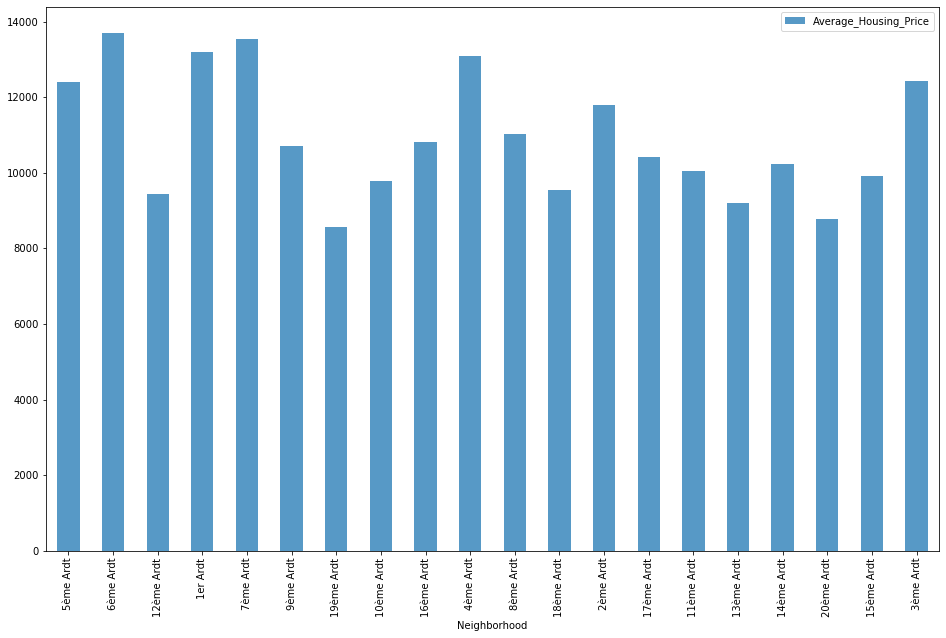

In [220]:
Paris_Avg_HousingPrice.plot(kind='bar',figsize=(16,10),alpha=0.75)

In [232]:
Paris_Avg_HousingPrice.describe()

,Average_Housing_Price
count,20.000000
mean,10936.000000
std,1634.320718
min,8580.000000
25%,9730.000000
50%,10555.000000
75%,12412.500000
max,13700.000000


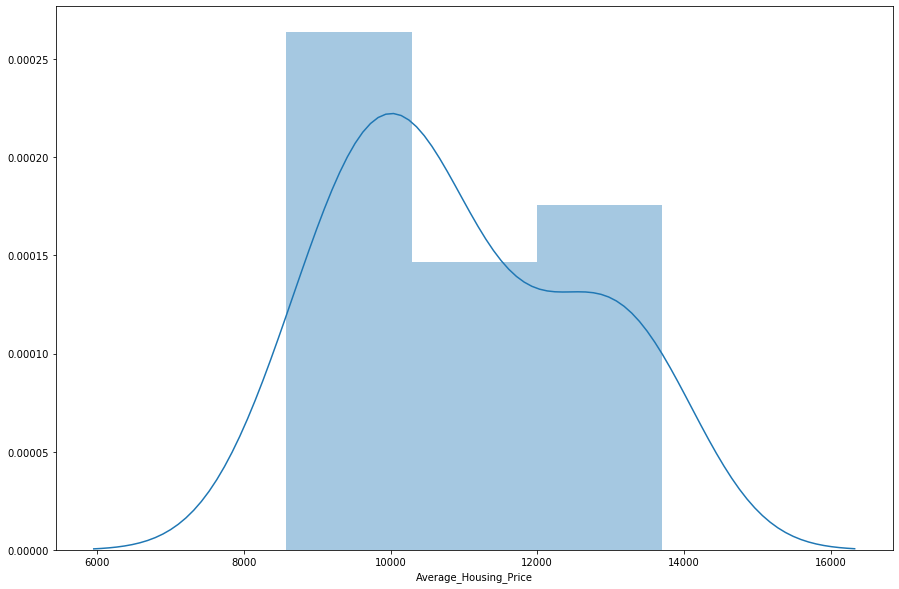

In [228]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(Paris_Avg_HousingPrice['Average_Housing_Price'])

**School Rating by Clusters**

In [187]:
new_Paris=Paris_merged.set_index("neigbourhood",drop=True)
#Source:https://www.letudiant.fr/palmares/classement-lycees/academie-paris.html
Paris_school_ratings=pd.DataFrame({"Neighborhood":paris["neigbourhood"],
                                      "Top School Rating":[8,8,8,6,9,8,9,9,8,8,8,9,9,9,8,9,9,8,8,7
                                                           ]})

In [189]:
Paris_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

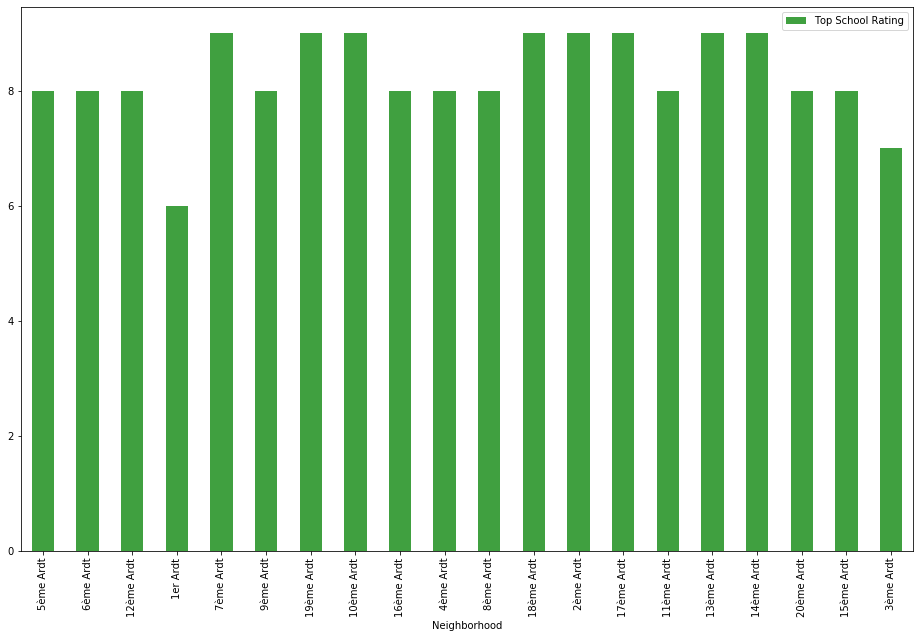

In [191]:

Paris_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);

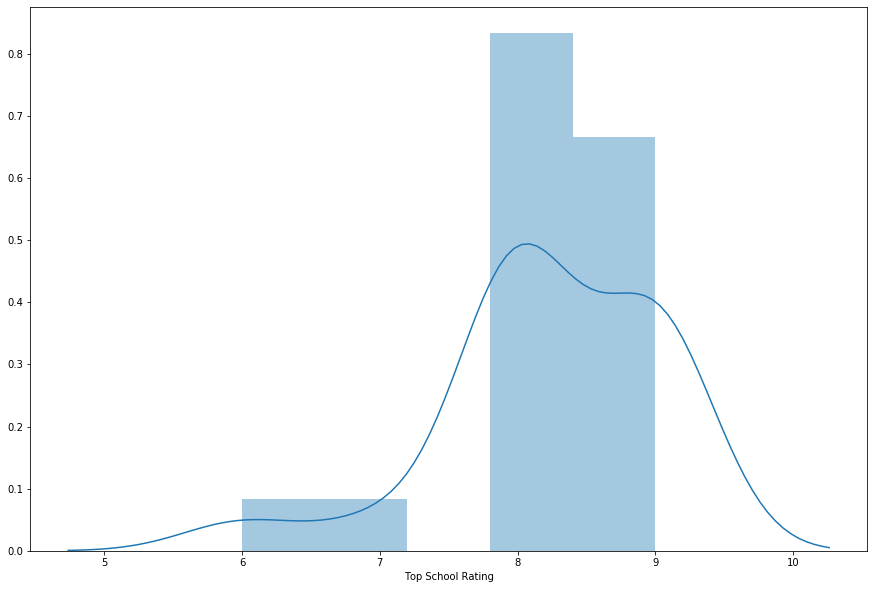

In [227]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(Paris_school_ratings['Top School Rating'])

In [233]:
Paris_school_ratings.describe()

,Top School Rating
count,20.000000
mean,8.250000
std,0.786398
min,6.000000
25%,8.000000
50%,8.000000
75%,9.000000
max,9.000000


#### **Cross Tables showing Top School Rating and Average_Housing_Price per Neigbourhood**

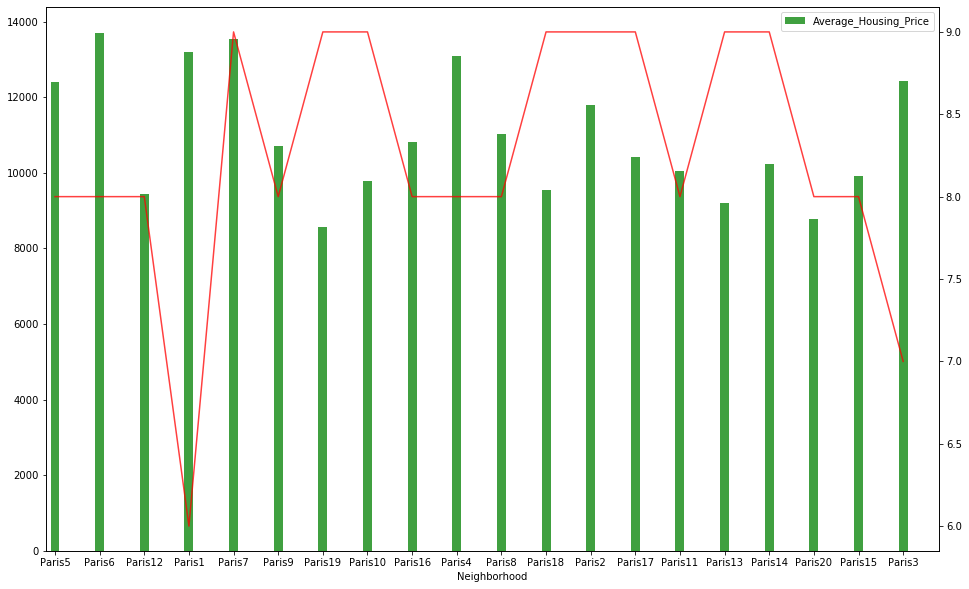

In [218]:

width = .2 # width of a bar

m1_t = pd.DataFrame({
 'Top School Rating' : Paris_school_ratings['Top School Rating'],
 'Average_Housing_Price' : Paris_Avg_HousingPrice['Average_Housing_Price'],
 })

m1_t[['Average_Housing_Price']].plot(kind='bar', width = width, figsize=(16,10),color='green',alpha=0.75 )
m1_t['Top School Rating'].plot(secondary_y=True, figsize=(16,10),color='red',alpha=0.75, label='Top School Rating')

ax = plt.gca()
plt.xlim([-width, len(m1_t['Top School Rating'])-width])
ax.set_xticklabels(('Paris5','Paris6','Paris12','Paris1','Paris7','Paris9','Paris19','Paris10','Paris16','Paris4','Paris8','Paris18','Paris2','Paris17','Paris11','Paris13','Paris14','Paris20','Paris15','Paris3' ))

plt.show()

## **Conclusion**


 In this project, using k-means cluster algorithm I separated the neighborhood into 5 different clusters , which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average house prices and school rating have been made.